In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
wine_load = load_wine()
wine = pd.DataFrame(wine_load.data, columns = wine_load.feature_names)
wine['Class'] = wine_load.target
wine['Class'] = wine['Class'].map({0:'class_0', 1: 'class_1', 2: 'class_2'})

wine_type = wine['Class'].value_counts()
wine_type


class_1    71
class_0    59
class_2    48
Name: Class, dtype: int64

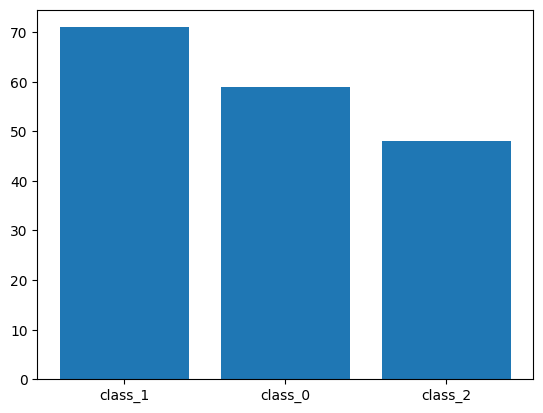

In [ ]:
plt.bar(wine_type.index, wine_type.values, width = 0.8, bottom = None, align = 'center') # plt.bar(x=좌표, height, width, botom(누적막대그래프), align 좌표정렬
plt.show()

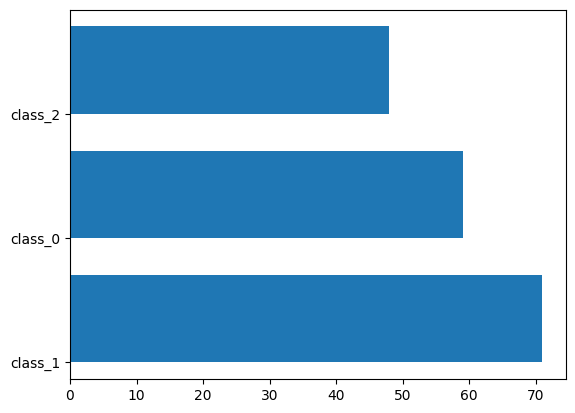

In [ ]:
plt.barh(wine_type.index, wine_type.values, height = 0.7, left = None, align='edge')
plt.show()

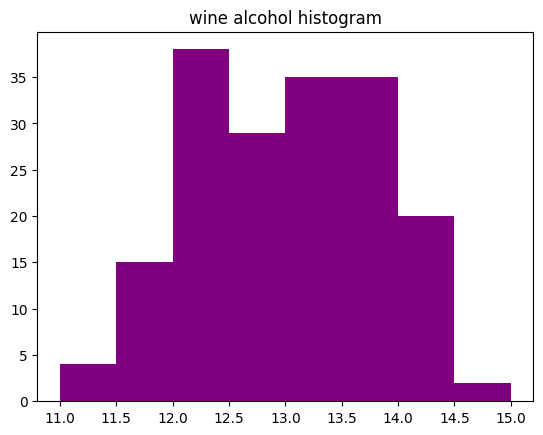

In [ ]:
plt.title('wine alcohol histogram')
plt.hist('alcohol', bins = 8, range = (11, 15), color = 'purple', data = wine)
plt.show()

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
0         Setosa
1         Setosa
2     

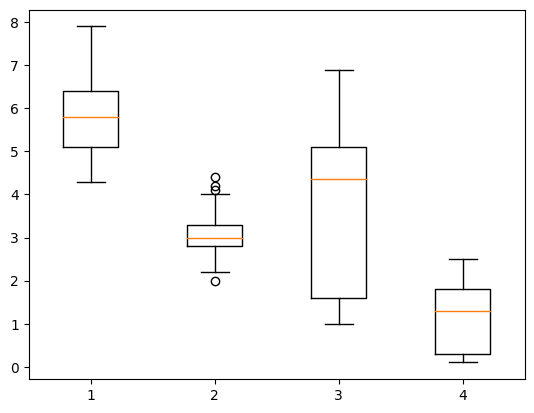

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
iris = pd.DataFrame(iris.data, columns = iris.feature_names )
print(iris)
iris['class'] = load_iris().target  #데이터 내의 target값을 따로 class로 변경
iris['class'] = iris['class'].map({0:'Setosa', 1: 'Versicolour', 2: 'virginica'})
print(iris['class'])
plt.boxplot(iris.drop(columns= 'class')) # 연속형만 출력되므로 class 의 칼럼과 같은 object은 삭제 후 출력
plt.show()

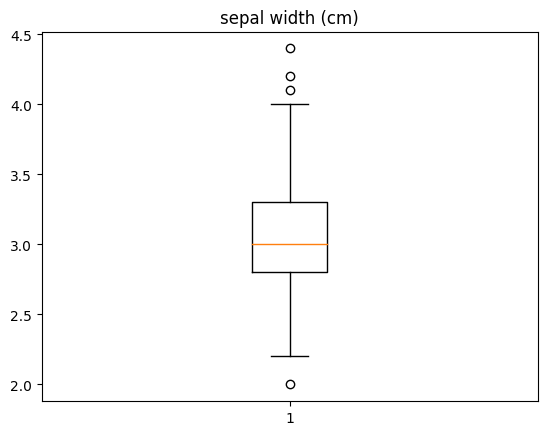

In [ ]:
plt.boxplot(iris['sepal width (cm)'], whis=1.5) # 수염의 길이를 구하기 위해 iqr에 곱할수 whis=1.5
plt.title('sepal width (cm)')
plt.show()

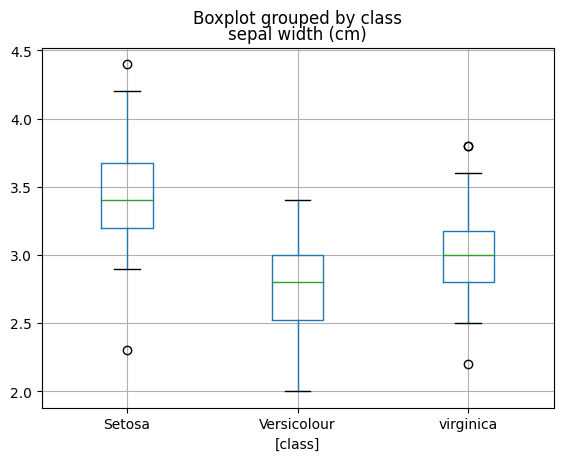

In [ ]:
iris[['sepal width (cm)', 'class']].boxplot(by = 'class') # 두 개의 열을 하나의 DataFrame으로 결합 그룹별로 박스플롯 그리기
plt.show()

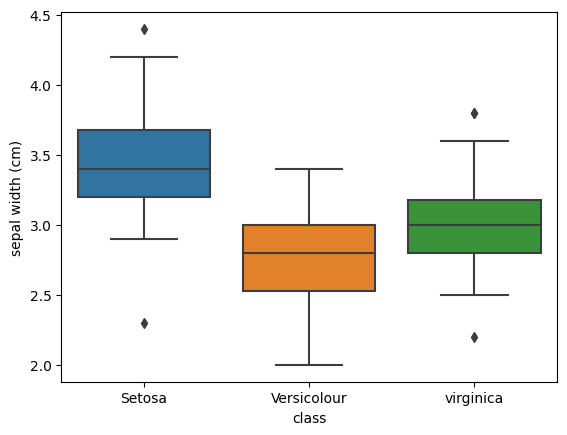

In [ ]:
import seaborn as sns
sns.boxplot(x = 'class', y = 'sepal width (cm)', data = iris) #두 개의 열을 하나의 DataFrame으로 결합 후 박스플롯 출력
plt.show()

##산점도

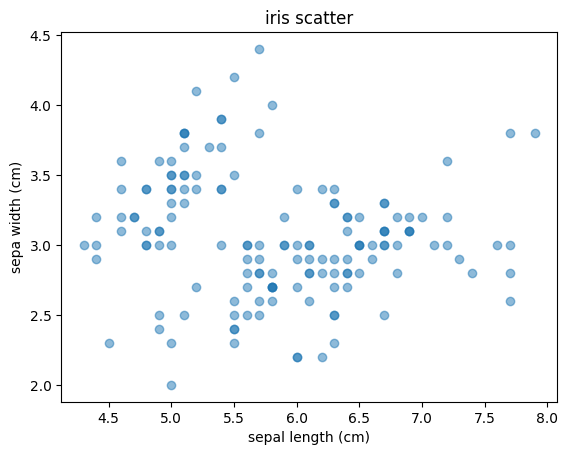

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
iris = pd.DataFrame(iris.data, columns = iris.feature_names )
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0: 'setosa', 1: 'versicolour', 2: 'virginica'})

plt.title('iris scatter')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepa width (cm)')

plt.scatter(x = iris['sepal length (cm)'], y = iris['sepal width (cm)'], alpha = 0.5)
plt.show()


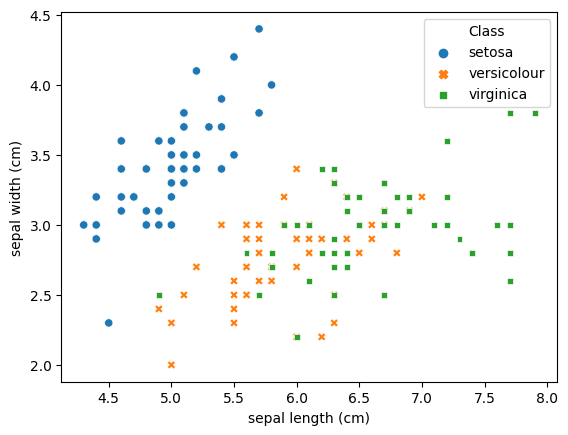

In [ ]:
import seaborn as sns

sns.scatterplot(x = 'sepal length (cm)', y = 'sepal width (cm)', data = iris, hue = 'Class', style='Class') #hue 인수를 지정하면 범례가 자동으로 출력, style은 모양을 다르게 출력
plt.show()

##선그래프


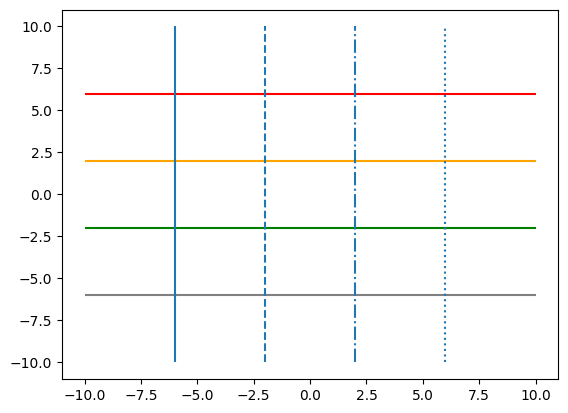

In [ ]:
plt.hlines(-6, -10, 10,  color = 'gray')
plt.hlines(-2, -10, 10, color = 'green')
plt.hlines(2, -10, 10, color = 'orange')
plt.hlines(6, -10, 10, color = 'red')
plt.vlines(-6, -10, 10, linestyles = 'solid')
plt.vlines(-2, -10, 10, linestyle = 'dashed')
plt.vlines(2, -10, 10, linestyles = 'dashdot')
plt.vlines(6, -10, 10 , linestyles = 'dotted')
plt.show()

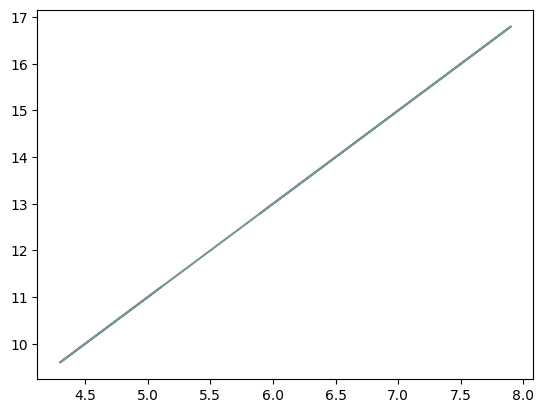

In [ ]:
def linear_func(x):
  return 2 * x +1

X = iris['sepal length (cm)']
plt.plot(X, linear_func(X), c = '#789395')
plt.show()

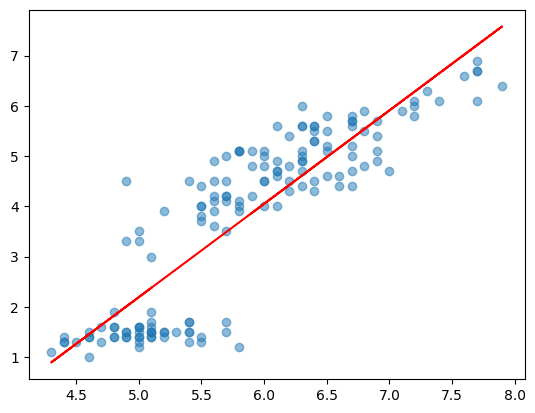

In [ ]:
import numpy as np
X, Y = iris['sepal length (cm)'], iris['petal length (cm)']
b1, b0 = np.polyfit(X, Y, 1)
plt.scatter(x = X, y = Y, alpha = 0.5)
plt.plot(X, b1*X + b0, color = 'red')
plt.show()

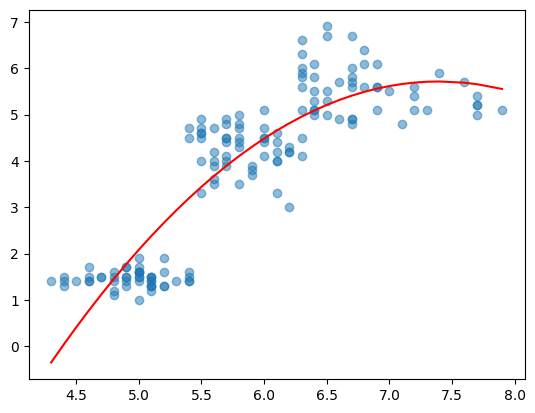

In [ ]:
iris2 = iris.sort_values(by = 'sepal length (cm)') # 2차 이상의 그래프는 X에 대해 정렬해야 출력이 됨
X, Y =iris2['sepal length (cm)'], iris['petal length (cm)']
b2, b1, b0 = np.polyfit(X, Y, 2)
plt.scatter(X, Y, alpha = 0.5)
plt.plot(X, b2*X**2 + b1*X+ b0, color = 'red')
plt.show()

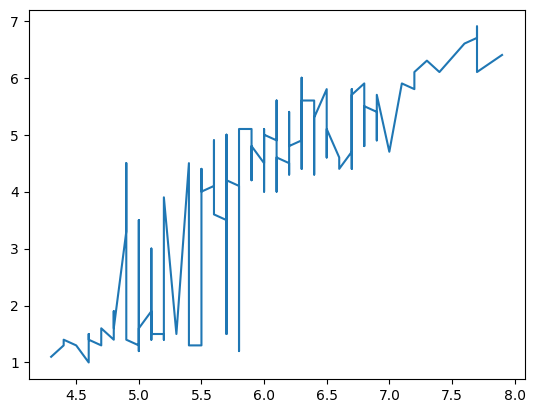

In [ ]:
iris2 = iris.sort_values(by = 'sepal length (cm)')
plt.plot('sepal length (cm)','petal length (cm)', data = iris2 )
plt.show()

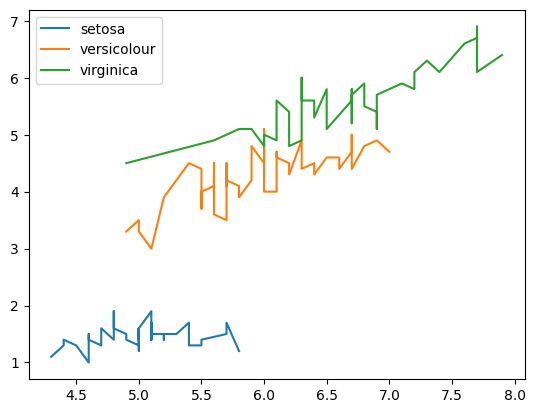

In [ ]:
plt.plot('sepal length (cm)', 'petal length (cm)', data = iris2.loc[iris2['Class']=='setosa'])
plt.plot('sepal length (cm)', 'petal length (cm)', data = iris2.loc[iris2['Class']=='versicolour'])
plt.plot('sepal length (cm)', 'petal length (cm)', data = iris2.loc[iris2['Class']=='virginica'])
plt.legend(iris2.Class.unique())
plt.show()

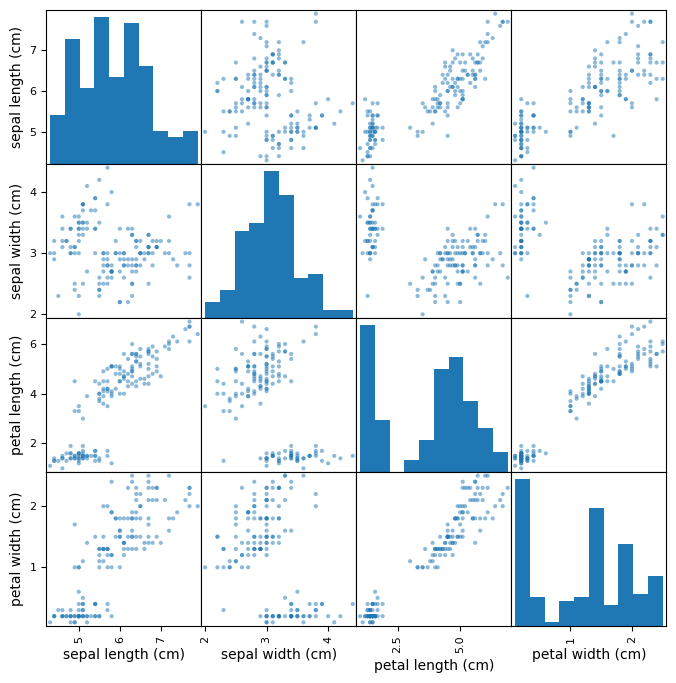

In [ ]:
from pandas.plotting import scatter_matrix # 산점도와 히스코 그램을 같이 그려 분포, 상관관계와 이상치를 탐지

scatter_matrix(iris, alpha=0.5, figsize=(8,8), diagonal = 'hist')
plt.show()

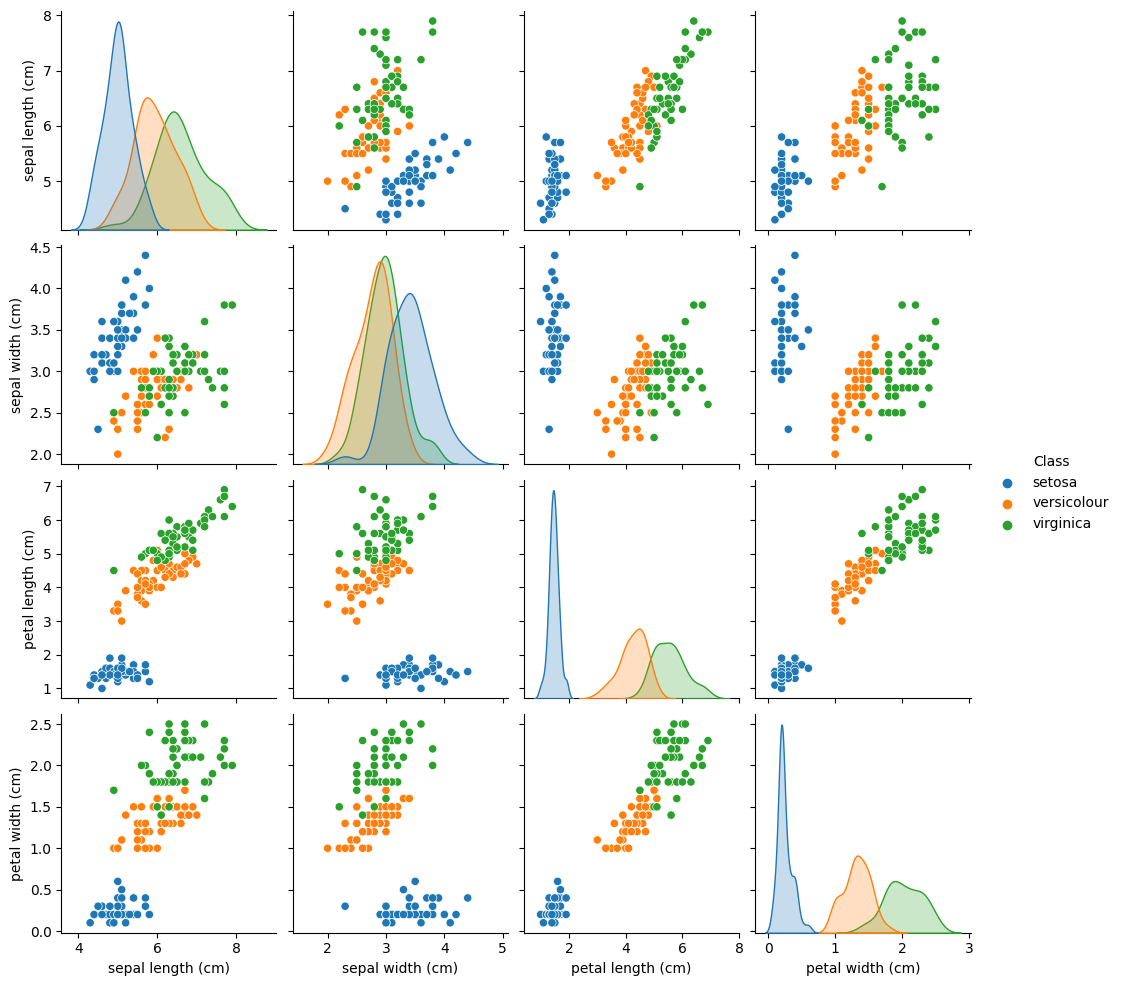

In [ ]:
sns.pairplot(iris, diag_kind = 'auto', hue = 'Class')
plt.show()

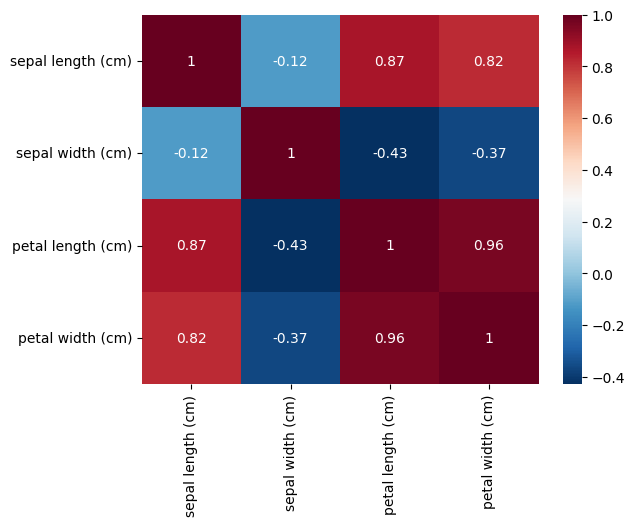

In [ ]:
iris_corr = iris.drop(columns = 'Class').corr(method='pearson')
sns.heatmap(iris_corr,  cmap = 'RdBu_r', annot = True) #xticklabels= iris_corr.columns, yticklabels = iris_corr.columns, annot = True(상관계수값 표시)
plt.show()